## EDA over Longkanker

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
lungdata = pd.read_csv('survey lung cancer.csv')
lungdata

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55389,1,18,1,1,1,2,1,2,1,1,2,2,1,2,1,1
55390,0,60,1,1,2,1,1,1,2,2,2,2,1,2,1,2
55391,1,38,2,1,2,1,1,1,2,2,1,1,2,1,2,1
55392,0,26,2,2,1,1,1,1,2,1,2,1,1,1,1,2


## Exploratieve Data Analyse
Om te beginnen: zijn er missende waardes?

In [16]:
lungdata.isnull().values.any()

False

Er zijn geen missende waardes in de dataset

In [17]:
lungdata.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000,55394.000000
mean,0.502004,44.137614,1.499531,1.496299,1.500614,1.496769,1.501047,1.497924,1.501914,1.501065,1.498447,1.505055,1.500758,1.499964,1.501643,1.496101
std,0.500000,15.309217,0.500004,0.499991,0.500004,0.499994,0.500003,0.500000,0.500001,0.500003,0.500002,0.499979,0.500004,0.500005,0.500002,0.499989
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,44.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,57.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Het is opvallend dat bij alle categorische kolommen (behalve GENDER) 1 en 2 wordt gebruikt, 2 = ja en 1 = nee. Maar bij GENDER wordt 0 en 1 gebruikt, 1 = man, 0 = vrouw.

Om de data duidelijker te maken vervangen we in alle kolommen (behalve leeftijd, AGE) de cijfers met de male/female of yes/no.

In [18]:
lungdata['GENDER'] = lungdata['GENDER'].replace({1:'male', 0:'female'})
for kolom in ['SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','FATIGUE','ALLERGY','WHEEZING','ALCOHOL CONSUMING','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY','CHEST PAIN','LUNG_CANCER']:
    lungdata[kolom] = lungdata[kolom].replace({1:'no', 2:'yes'})

De enige niet categorische kolom is leeftijd (AGE), dit is in deze kolom de verdeling:

array([[<Axes: title={'center': 'AGE'}>]], dtype=object)

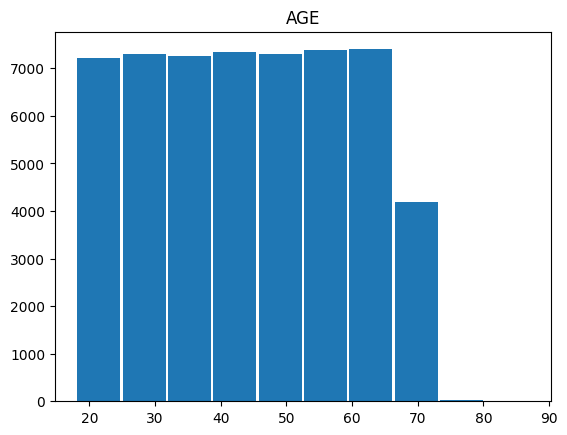

In [19]:
lungdata.hist('AGE', rwidth=0.95, grid=False)

In [20]:
print(f'70 or older:',lungdata['AGE'].ge(70).sum())
print(f'80 or older:',lungdata['AGE'].ge(80).sum())
pd.DataFrame(lungdata['AGE'].describe())

70 or older: 1106
80 or older: 3


,AGE
count,55394.000000
mean,44.137614
std,15.309217
min,18.000000
25%,31.000000
50%,44.000000
75%,57.000000
max,87.000000


De leeftijd tot en met 60 jaar is extreem gelijk verdeeld, daarna neemt de hoeveelheid mensen sterk af. Van de 55394 mensen zijn 1106 mensen 70+ en 3 mensen 80+. 

## Verdeling man vrouw

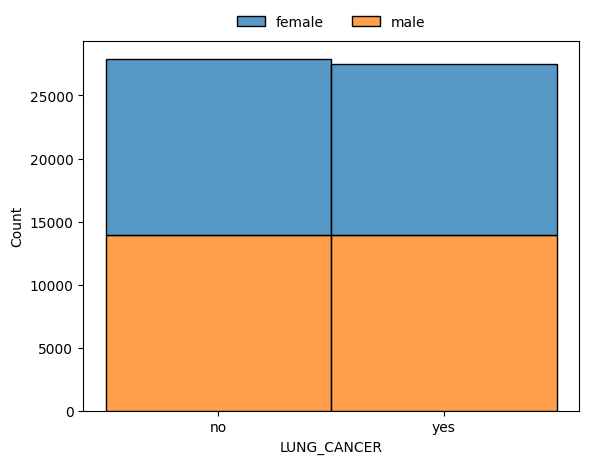

In [21]:
axs = sns.histplot(lungdata, x='LUNG_CANCER', hue='GENDER', multiple='stack', bins=2)
sns.move_legend(axs, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

Er is schokkend weinig verschil tussen deze vier groepen. bij mannen is het perfect verdeeld, en bij vrouwen zijn er iets meer die geen longkanker hebben.

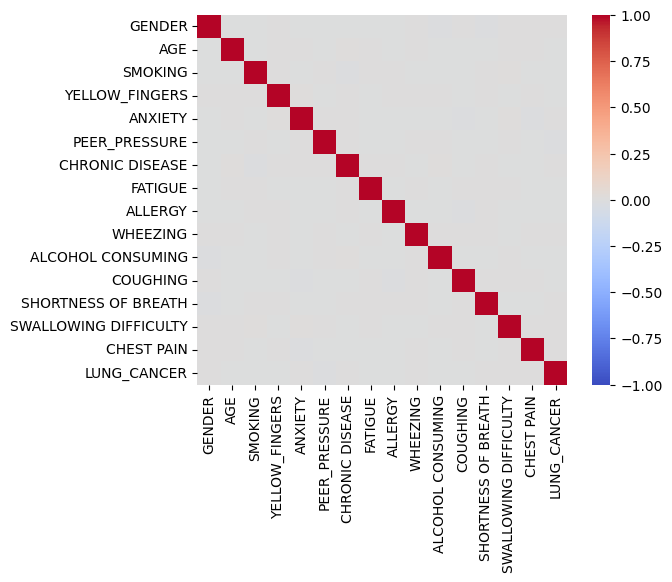

In [22]:
lungdata = pd.read_csv('survey lung cancer.csv')
axs = sns.heatmap(lungdata.corr(), cmap="coolwarm", vmin=-1.0, vmax=1.0, square=True)

Toen ik de heatmap voor het eerst zag ging ik ervanuit dat er iets in de code fout was gegaan, alle vakjes (naast met zichzelf vergelijkende) zijn grijs. <br>
Om te checken of het wel klopt proberen we het volgende:

In [23]:
lungdata.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,-0.001740,-0.001729,0.000571,-0.001521,-0.002682,-0.003619,-0.003991,-0.003843,0.002699,-0.008436,0.000032,-0.008383,0.002744,0.004211,0.007253
AGE,-0.001740,1.000000,-0.001042,0.001289,0.002827,-0.000269,0.008720,0.003498,-0.003469,0.001161,-0.003461,-0.000948,-0.003281,0.005846,0.001377,-0.003676
SMOKING,-0.001729,-0.001042,1.000000,0.000571,-0.000901,0.002882,-0.009999,0.002379,0.001556,-0.004981,-0.001844,-0.001615,0.001337,0.009568,-0.002019,-0.003004
YELLOW_FINGERS,0.000571,0.001289,0.000571,1.000000,0.007880,-0.001384,0.001099,-0.004977,0.002917,0.006118,0.003804,-0.003536,0.004272,-0.001950,0.000999,-0.002730
ANXIETY,-0.001521,0.002827,-0.000901,0.007880,1.000000,0.004918,0.001189,-0.003461,-0.004807,-0.002025,-0.002487,-0.008642,-0.001699,0.008629,-0.008886,0.004595
PEER_PRESSURE,-0.002682,-0.000269,0.002882,-0.001384,0.004918,1.000000,0.001819,-0.002229,-0.000481,0.000194,0.003735,-0.001018,-0.002373,0.007726,-0.002398,-0.008138
CHRONIC DISEASE,-0.003619,0.008720,-0.009999,0.001099,0.001189,0.001819,1.000000,0.003403,0.005661,-0.003398,0.008563,-0.003307,0.006532,-0.001913,-0.001018,0.005324
FATIGUE,-0.003991,0.003498,0.002379,-0.004977,-0.003461,-0.002229,0.003403,1.000000,-0.003956,0.003006,-0.002685,0.000114,0.003906,0.000072,-0.005944,-0.000466
ALLERGY,-0.003843,-0.003469,0.001556,0.002917,-0.004807,-0.000481,0.005661,-0.003956,1.000000,-0.004991,-0.000241,-0.008163,0.001041,-0.005885,-0.003262,-0.001739
WHEEZING,0.002699,0.001161,-0.004981,0.006118,-0.002025,0.000194,-0.003398,0.003006,-0.004991,1.000000,0.006000,0.001567,0.004763,-0.001227,0.002412,0.000305


Er is een extreem lage correlatie tussen de waardes, de dataset is niet geschikt voor verdere analyse.